In [1]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import corner
%matplotlib inline

In [9]:
data_HMC = np.load('../data/chains_HMC.npz')
data_gaussian = np.load('../data/chains_gaussian.npz')
print(data_HMC.files)
HMC_bestchain = data_HMC['chains'][np.argmax(data_HMC['log_prob'][:,-1])]
gaussian_bestchain = data_gaussian['chains'][np.argmax(data_gaussian['log_prob'][:,-1])]

['chains', 'log_prob', 'local_accs', 'global_accs']


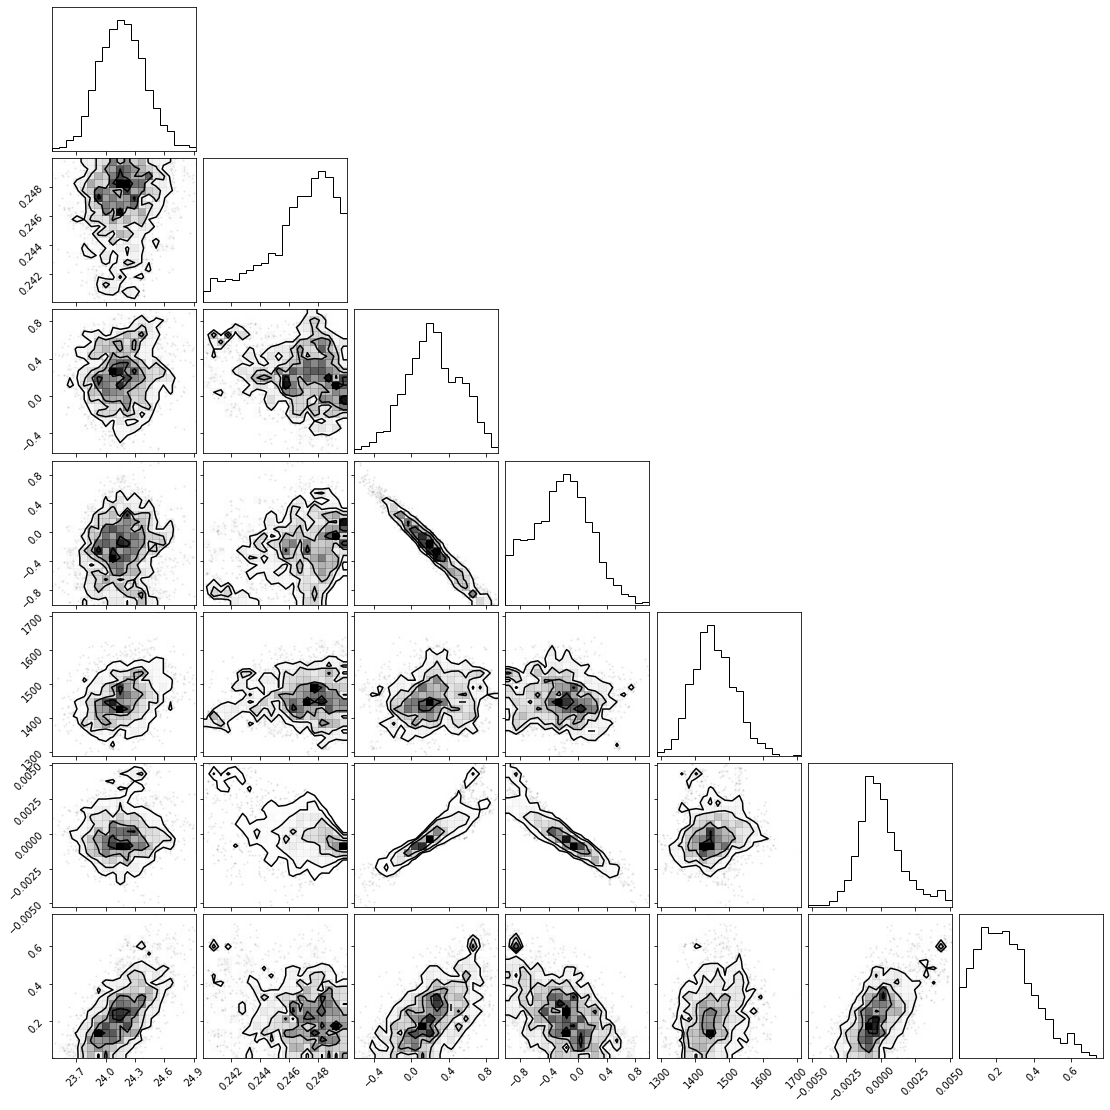

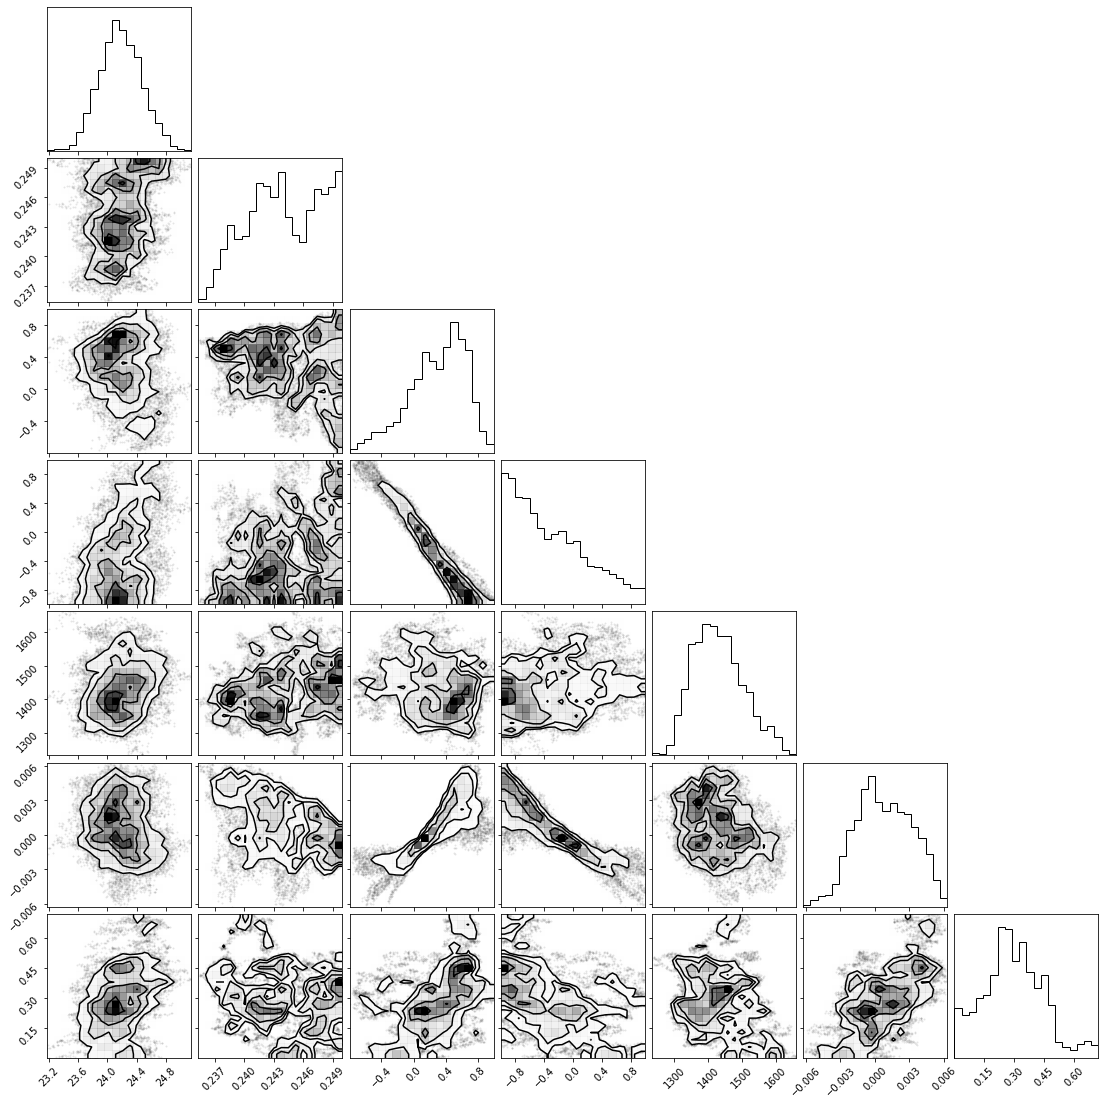

In [10]:
fig_HMC = corner.corner(HMC_bestchain[::100])
fig_gaussian = corner.corner(gaussian_bestchain[::100])

In [28]:
acl_HMC = az.autocorr(HMC_bestchain.T).T
acl_gaussian = az.autocorr(gaussian_bestchain.T).T
print(acl_HMC.shape, acl_gaussian.shape)

(200000, 7) (1500000, 7)


Text(0, 0.5, 'Autocorrelation')

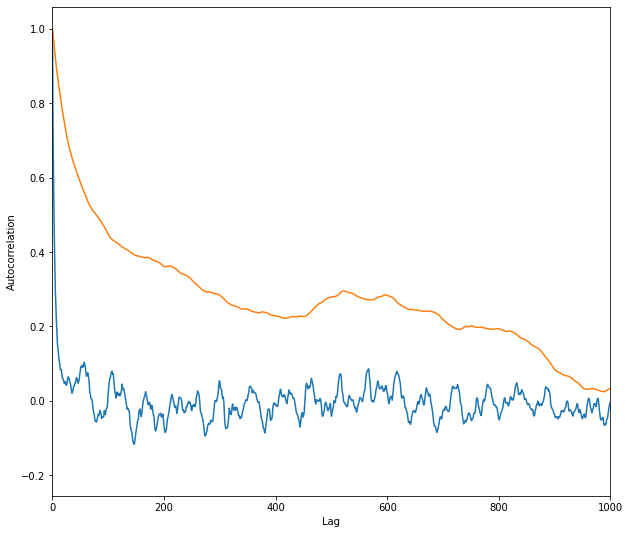

In [32]:
plt.figure(figsize=(10,9))
plt.plot(acl_HMC[::100,0], label='HMC')
plt.plot(acl_gaussian[::100,0], label='Gaussian')
plt.xlim(0,1000)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

In [38]:
for i in range(7):
    print(az.ess(HMC_bestchain[::100,i]), az.ess(gaussian_bestchain[::100,i]))

170.33123796920262 23.533906277945484
42.23332851071431 5.830084531160627
46.2811787047181 21.94860350969887
44.23972773764954 18.234657460248638
74.71415309046887 16.24623814926863
45.319906259309995 12.197984412015195
89.98077151965167 12.390434743274598
